In [31]:
%matplotlib inline

from matplotlib.pyplot import imshow, figure, colors
from PIL import Image, ImageFilter

import numpy as np
import copy as cp

import order_anchors as an

In [122]:
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


def preprocess_image(filename, convolutions=2, kernel=[[1,2,1],[2,4,2],[1,2,1]], thresholds=[8,2], show_im=False):

    assert isinstance(convolutions, int), "Convolutions must be an integer" 
    assert isinstance(filename, str), "File must be a string"
    assert convolutions >= 0, "Convolutions must be >= 0"
    assert len(thresholds) >= convolutions, "Cannot have more convolutions than thresholds"

    im = Image.open(filename)
    im = np.asarray(im.convert('1'))
    im = np.array(im, dtype=int)

    i=0
    while (convolutions > 0):
        im = convolve2d(im, kernel)
        im = np.asarray([[1 if val > thresholds[i] else 0 for val in row] for row in im])
        convolutions -= 1
        i += 1
        
    return(im)
        


In [130]:
def Anchors(image, grid_size=5, skip_size=3, sensitivity=0.8):
    assert type(image) == np.ndarray, "Invalid Input: Image must be numpy array!"
    width, height = image.shape
    assert grid_size <= height and grid_size <= width, "Invalid Input: Grid size larger than image!"
    assert type(grid_size) == int and type(skip_size) == int, "Grid ({}) and Skip ({}) sizes must be integers!".format(grid_size, skip_size)
    
    anchors = []
    for x in range(0, width, grid_size + skip_size):
        for y in range(0, height, grid_size + skip_size):
            sub_image = image[x:x+grid_size, y:y+grid_size]
            sub_w, sub_h = sub_image.shape
            sub_density = np.sum(sub_image) / (sub_w*sub_h)

            if  sub_density <= 1-sensitivity:
                anchors.append((x,y))
    return(anchors)


def ApplyAnchors(image, grid_size=5, skip_size=3, sensitivity=0.8, order=True):
    image = cp.deepcopy(image)
    anchors = Anchors(image, grid_size=grid_size, skip_size=skip_size, sensitivity=sensitivity)
    
    if order:
        if len(anchors) > 500:
            print("Warning: Ordering {} anchors may take very long. Try 500 or less.".format(len(anchors)))
        anchors = an.order_anchors(anchors)
    
    for i, anchor in enumerate(anchors):
        x, y = anchor
        
        if order:
            val = (i+5+len(anchors)/2)
        else:
            val = 2
            
        image[x:x+8,y:y+8] = val

    return(image)

## Try different image preprocessing settings

In [23]:
image0 = preprocess_image("SampleSentence.jpg", convolutions=0, thresholds=[])
image1 = preprocess_image("SampleSentence.jpg", convolutions=1, thresholds=[5])
image2 = preprocess_image("SampleSentence.jpg", convolutions=1, thresholds=[8])
image3 = preprocess_image("SampleSentence.jpg", convolutions=2, thresholds=[8,2])
image4 = preprocess_image("SampleSentence.jpg", convolutions=2, thresholds=[7,3])

## Anchoring Examples

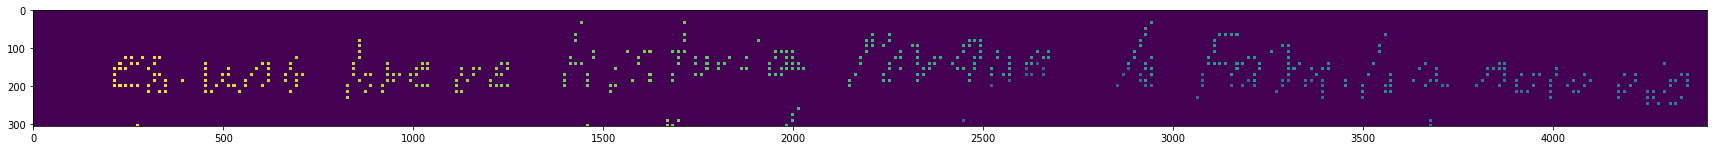

In [73]:
anchored = ApplyAnchors(image0, order=True, skip_size=10)
figure(figsize=(30,30))
imshow(anchored)

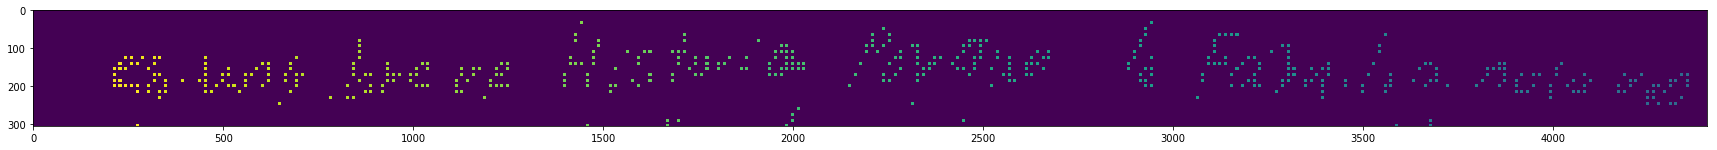

In [74]:
anchored = ApplyAnchors(image1, order=True, skip_size=10)
figure(figsize=(30,30))
imshow(anchored)

[(0, 56), (0, 64), (0, 72), (0, 80), (24, 2936)]


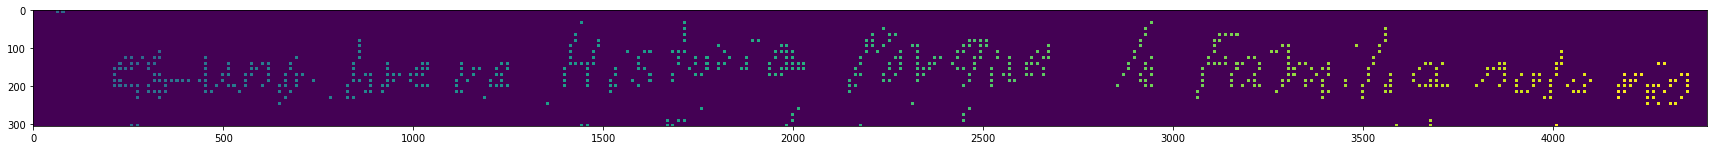

In [78]:
anchored = ApplyAnchors(image2, order=True, skip_size=10)
figure(figsize=(30,30))
imshow(anchored)

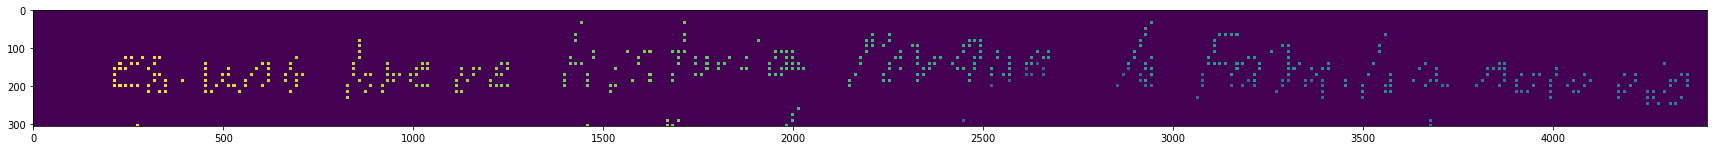

In [76]:
anchored = ApplyAnchors(image3, order=True, skip_size=10)
figure(figsize=(30,30))
imshow(anchored)

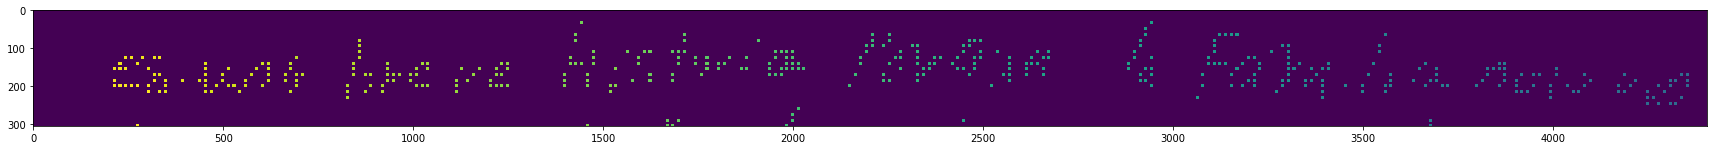

In [77]:
anchored = ApplyAnchors(image4, order=True, skip_size=10)
figure(figsize=(30,30))
imshow(anchored)

## Anchoring letter and exporting anchors example

In [124]:
a = preprocess_image("Letter_a.png", convolutions=1, thresholds=[10])

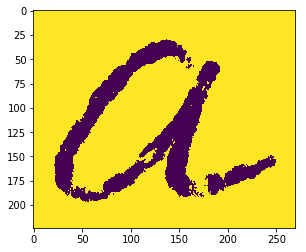

In [125]:
imshow(a)

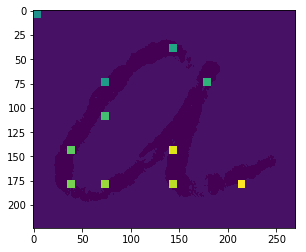

In [145]:
anchored_a = ApplyAnchors(a, skip_size=30, sensitivity=1)
imshow(anchored_a)

In [147]:
anchors = Anchors(a, skip_size=30, sensitivity=1)
x = [anchor[0] for anchor in anchors]
y = [anchor[1] for anchor in anchors]
print("x={}".format(x))
print("y={}".format(y))

x=[0, 35, 70, 70, 105, 140, 140, 175, 175, 175, 175]
y=[0, 140, 70, 175, 70, 35, 140, 35, 70, 140, 210]
